# Assignment 3: Week 1 - Linear Regression Model

* Determine the optimal price at which they should sell Lego products based on the number of Lego pieces in the Lego set and the age of the customer that the product is most likely to be purchased by. 

    * Independent variable - lego pieces, age of customer
    * Dependent variable - price of lego products

1. What price should be set for the Lego sets with 8,000 Lego pieces? (Simple linear regression)
2. What price should be set for the Lego sets with 8,000 Lego pieces that are most likely to be purchased by 30-year-old customers? (Multiple linear regression)


In [1]:
# Import all the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import scipy
from scipy.stats import skew

In [2]:
# Define directory
!pwd

/Users/hazel/Documents/LSE Data Analytics/Course 3 - Advanced Analytics/Assignment 3


In [3]:
# Assign path to 'dir' variable
dir = '/Users/hazel/Documents/LSE Data Analytics/Course 3 - Advanced Analytics/Assignment 3/game_data/'

## 1. Import file

In [4]:
# Import data set
lego = pd.read_csv(dir + 'lego.csv')

In [5]:
# View data frame
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [6]:
# View metadata
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [7]:
# Check for missing values
lego.isna().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

Initial observation is that all data is numeric and there are no missing values in lego dataset.

## 2. Print min and max to view distribution of values

In [8]:
# Descriptive statistics
lego.describe().round(2)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00,12261.00,12261.00,12261.00,12261.00,12261.00,12261.00
mean,16.69,65.14,14.60,493.41,3.71,1.99,10.02
std,8.22,91.98,34.36,825.36,1.64,1.79,6.19
min,0.00,2.27,0.00,1.00,0.00,0.00,0.00
25%,11.00,19.99,1.00,97.00,3.60,0.00,4.00
50%,19.00,36.59,4.00,216.00,4.40,2.00,10.00
75%,23.00,70.19,11.00,544.00,4.70,4.00,15.00
max,30.00,1104.87,367.00,7541.00,5.00,5.00,20.00


# 3. Create some visualisations to explore the data and understand the pricing trends of the Lego products.

### 3.1 Distribution of Price

**Report**: Distribution of price is skewed to the right which indicates that the data is biased towards higher priced lego products with a skewness of 4.68 which is much greater than 1. As indicated by the boxplot below, majority of the price is between USD20 to USD70, with outliers ranging from USD 150 to USD 1100.

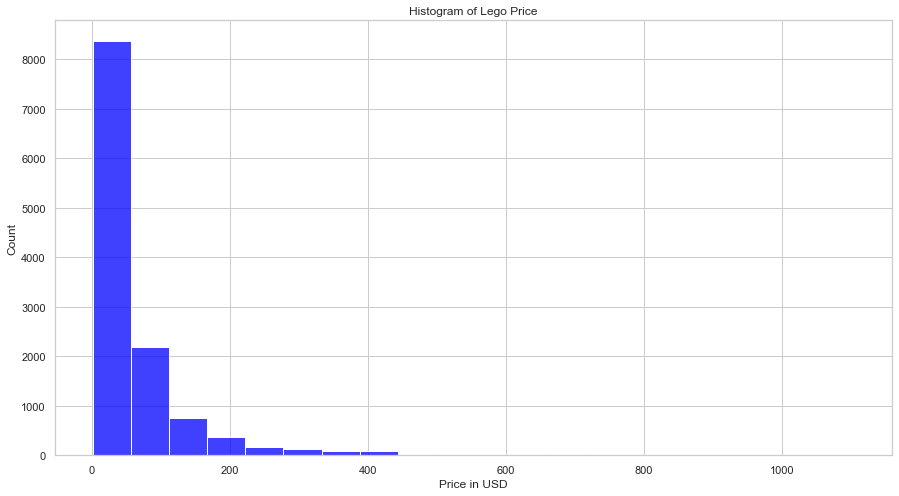

In [9]:
# Histogram of price
sns.set(rc = {"figure.figsize":(15, 8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=lego, x="list_price", bins=20, color = "blue")\
.set(title="Histogram of Lego Price", xlabel = "Price in USD", ylabel = "Count")

# Export graph
plt.savefig('Histogram of Lego Price.png')

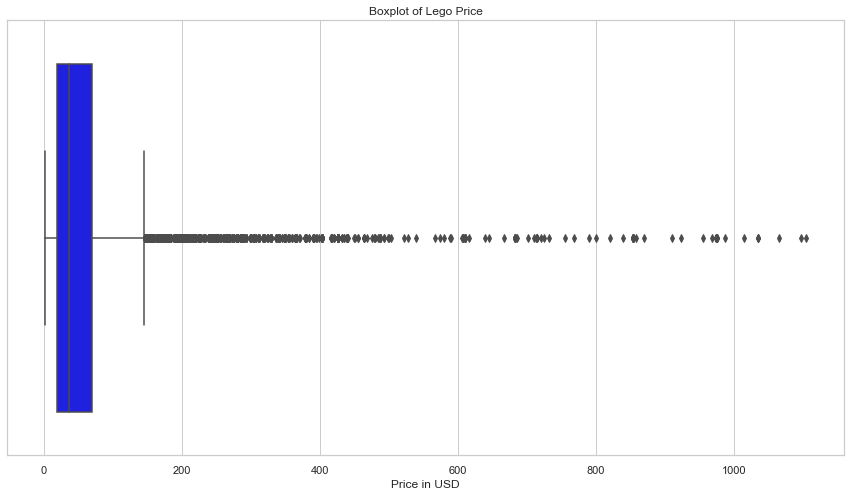

In [10]:
# Boxplot of price
sns.set_theme(style="whitegrid")
sns.boxplot(data=lego, x='list_price', color='blue').set(title='Boxplot of Lego Price', xlabel = "Price in USD")

# Export graph
plt.savefig('Boxplot of Lego Price.png')

In [11]:
# Skewness of list price
print(skew(lego['list_price'], axis=0, bias=True))

4.680102343989678


### 3.2 Distribution of Piece_Count

**Report:** There is a strongly right skewed distribution of lego pieces in the dataset indicated by a 3.97 skewness which is much greater than 1. The boxplot and historgram indicates that majority of the data is weighted to the left with majority of the lego pieces between 100 to 500 pieces. Outliers ranging from 1100 to 7000 pieces.

[Text(0.5, 1.0, 'Histogram of Lego Pieces')]

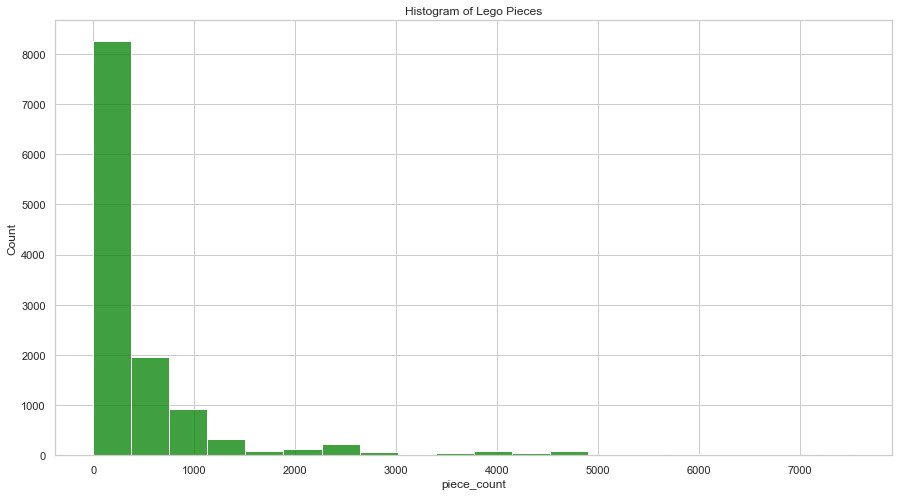

In [12]:
# Histogram of pieces
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=lego, x="piece_count", bins=20, color = 'green').set(title='Histogram of Lego Pieces')

[Text(0.5, 1.0, 'Boxplot of Lego Pieces')]

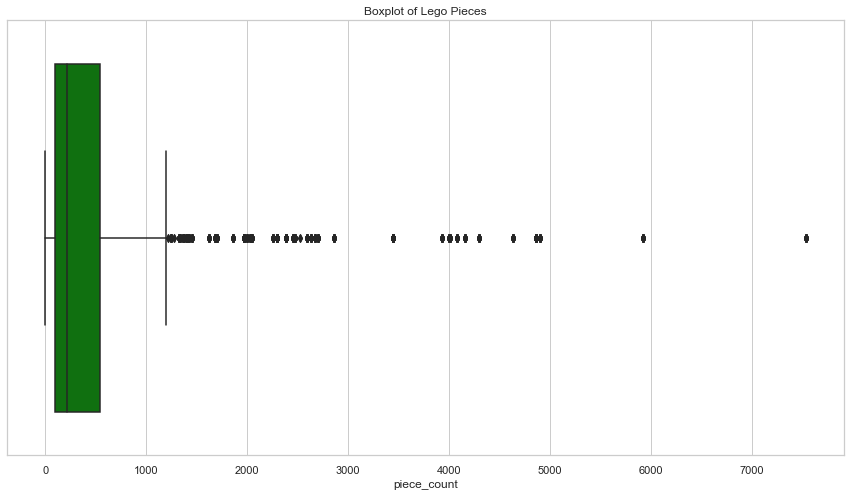

In [13]:
# Boxplot of pieces
sns.set_theme(style="whitegrid")
sns.boxplot(data=lego, x='piece_count', color='green').set(title='Boxplot of Lego Pieces')

In [14]:
# Skewness of pieces
print(skew(lego['piece_count'], axis=0, bias=True))

3.9675723265890634


### 3.3 Distribution of Ages

**Report:** Ages data points are more normally distributed with a skewness of -0.49 which is within -0.5 and 0.5 the acceptable range. Though the negative indicates that it's slightly more weighted towards the right tail of the distribution. Majority of the customers are aged between 11 to 23.

[Text(0.5, 1.0, 'Histogram of Ages')]

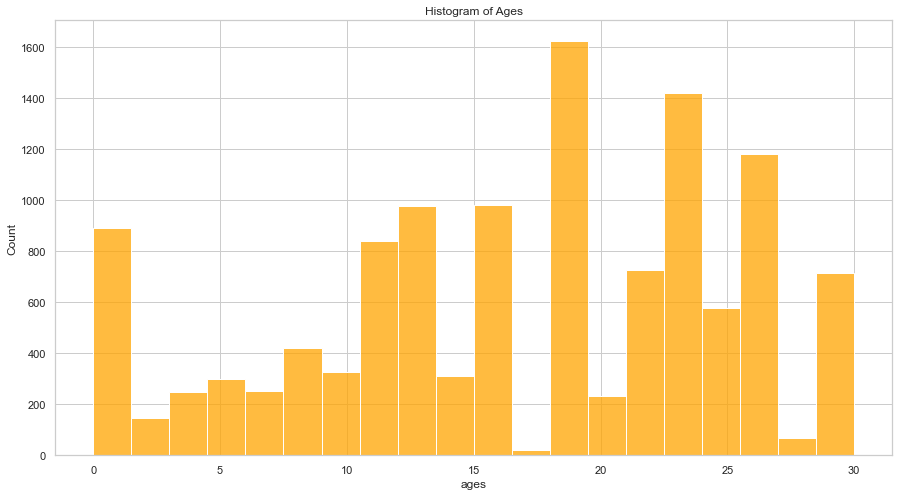

In [15]:
# Histogram of ages
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=lego, x="ages", bins=20, color = 'orange').set(title='Histogram of Ages')

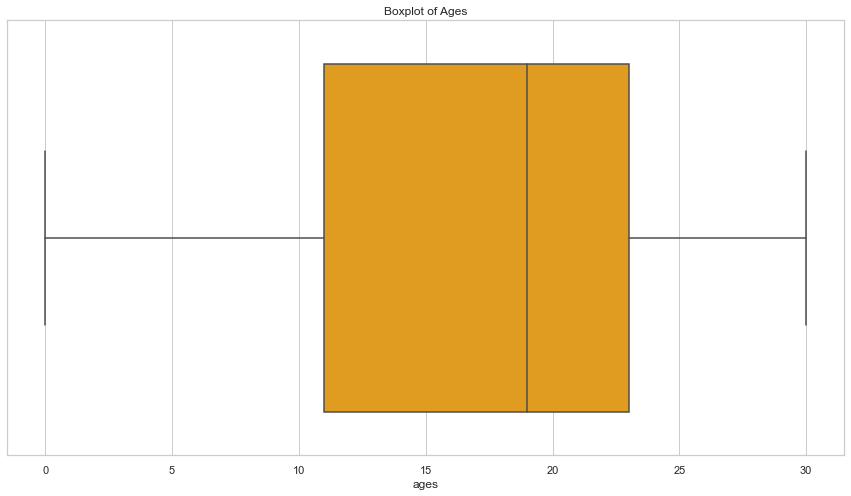

In [16]:
# Boxplot of pieces
sns.set_theme(style="whitegrid")
sns.boxplot(data=lego, x='ages', color='orange').set(title='Boxplot of Ages')

# Export graph
plt.savefig('Boxplot of Lego Customer Age.png')

In [17]:
# Skewness of pieces
print(skew(lego['ages'], axis=0, bias=True))

-0.48953988616447464


### 3.4 Visualise relationship between Price, Age and Piece Count variables

**Report:** Based on the scatterplot, there is a positive correlation between price and piece count. This means as the number of lego pieces increase, the more expensive the product is. While there is no obvious correlation between age and price as the points are scattered quite flat at as the age increases.

In [18]:
# column names
print(lego.columns)

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'country'],
      dtype='object')


[Text(0.5, 1.0, 'Relationship between Price and Pieces Count')]

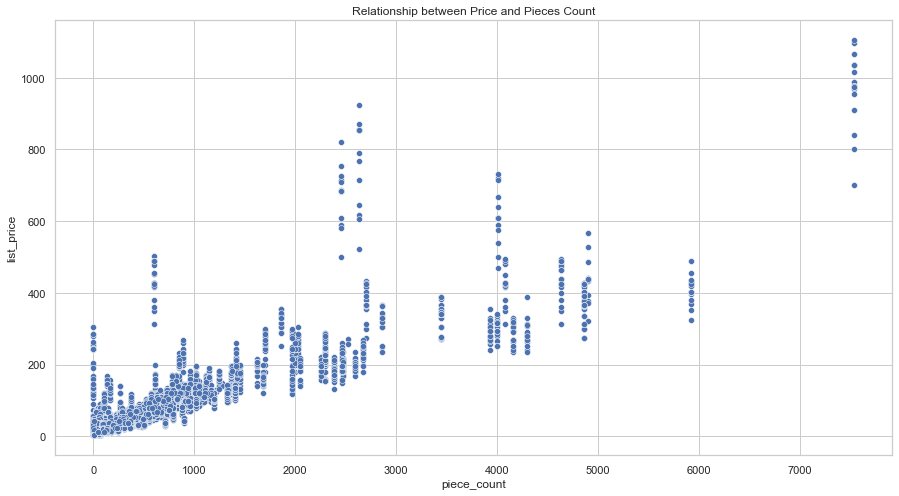

In [19]:
# Relationship between Price (dependent y variable) and Piece Count (independent x variable)
sns.scatterplot(data=lego, x="piece_count", y="list_price") \
.set(title='Relationship between Price and Pieces Count')

[Text(0.5, 1.0, 'Relationship between Price and Ages')]

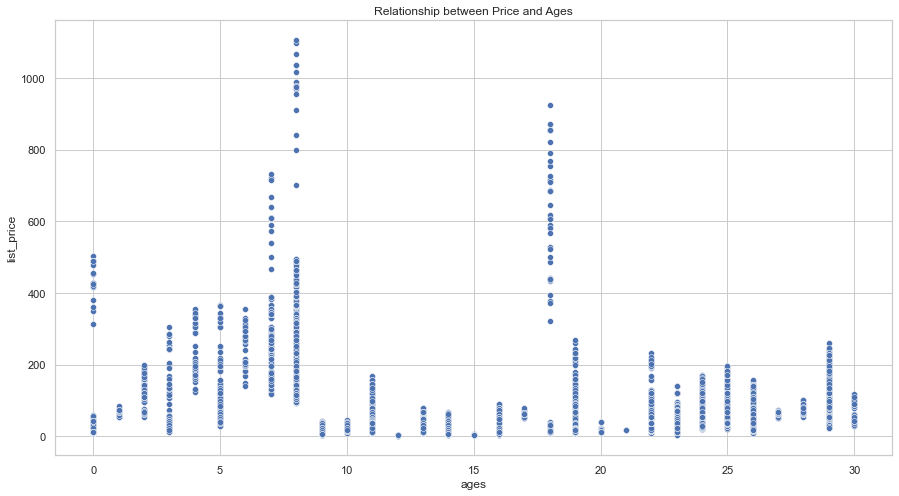

In [20]:
# Relationship between Price (dependent y variable) and Ages (independent x variable)
sns.scatterplot(data=lego, x="ages", y="list_price") \
.set(title='Relationship between Price and Ages')

# Part 1: Simple Linear Regression Model

Question: What price should be set for the Lego sets with 8,000 Lego pieces?

## 1. Create subset with Price and Piece variables

In [21]:
# Create subset with price and pieces variables

slr_data = lego[['list_price','piece_count']]

slr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   list_price   12261 non-null  float64
 1   piece_count  12261 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 191.7 KB


In [22]:
slr_data.head()

,list_price,piece_count
0,29.99,277
1,19.99,168
2,12.99,74
3,99.99,1032
4,79.99,744


In [23]:
round(slr_data.describe(),2)

,list_price,piece_count
count,12261.00,12261.00
mean,65.14,493.41
std,91.98,825.36
min,2.27,1.00
25%,19.99,97.00
50%,36.59,216.00
75%,70.19,544.00
max,1104.87,7541.00


## 2. Split the data into train (70%) and test (30%) data to ensure maximum model performance

The regression model should be run on training and testing data sets to ensure the model performance is accurate.

In [24]:
# Independent variable
X = slr_data[['piece_count']]

# Dependent variable
y = slr_data['list_price'] 

In [25]:
# Create  the subset (70/30); 
# Control the shuffling/avoid variation in values between variable.

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, 
                                                 random_state=100) 

## 2.1 Fit linear regression model with Training data set

In [26]:
# Fit linear regression model
lm = LinearRegression()

# Fit the model.
lm.fit(X_train, y_train) 

LinearRegression()

In [27]:
# Predict the training set values.
y_pred = lm.predict(X_train)

# Number of predicted values in training set
len(y_pred)

8582

In [28]:
#Check if number of predicted values is 70% of the original data set
original_data = 12261
training_set = original_data * 0.7

# 70% of rows from original lego dataset
round(training_set,2)

8582.7

Yes, the training set prediction is 70% of original data set

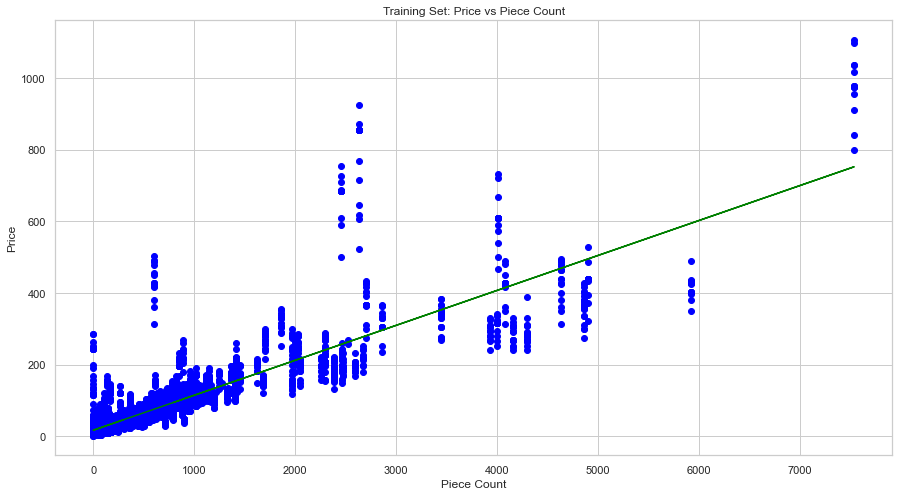

In [29]:
# Scatterplot to visualise training

# [1] Create a scatterplot.
plt.scatter(X_train, y_train, color = "blue")  
# [2] Create a regression line in green.
plt.plot(X_train, y_pred, color = "green")
# [3] Set the title for the graph.  
plt.title("Training Set: Price vs Piece Count")
# [4] Set the label for the x-axis.  
plt.xlabel("Piece Count")
# [5] Set the label for the y-axis.   
plt.ylabel("Price")

# Export graph
plt.savefig("Training Set: Price vs Piece Count")

In [30]:
# Print R-squared value of the training data.
print("R-Squared:", lm.score(X_train,y_train)) 

R-Squared: 0.7644351150518354


Quite strong R-squared value and explains 76% of the dependent variable.

In [31]:
# Print the intercept value of training set
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lm.coef_) 

Intercept value:  17.02159750575565
Coefficient value:  [0.09744347]


The coefficient value tells us that each additional lego piece in the product is associated with an increase of 0.097 USD in product price.

In [32]:
# Use the predict() method with an array to call the 
# Predict the price for a lego product with 8000 pieces.
predictedPrice = lm.predict([[8000]])  

# Print the results.
print(predictedPrice)

[796.56932178]


/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The training set linear regression model predicts the price to be USD 782 for a lego product containing 8000 pieces.

## 2.2 Test the linear model derived from training data set

Test accuracy of the linear model with the test data set.

In [33]:
# Linear regression; fitting the model.
lm.fit(X_test,y_test)

LinearRegression()

In [34]:
# Predict the test set values.
y_pred2 = lm.predict(X_test)

In [35]:
# Check if there are 30% of the total rows for predicted y values (price) 
len(y_pred2)

3679

In [36]:
#Check if number of predicted values is 70% of the original data set
original_data = 12261
test_set = original_data * 0.3

# 70% of rows from original lego dataset
round(test_set,2)

3678.3

Yes, the test set prediction is 30% of original data set.

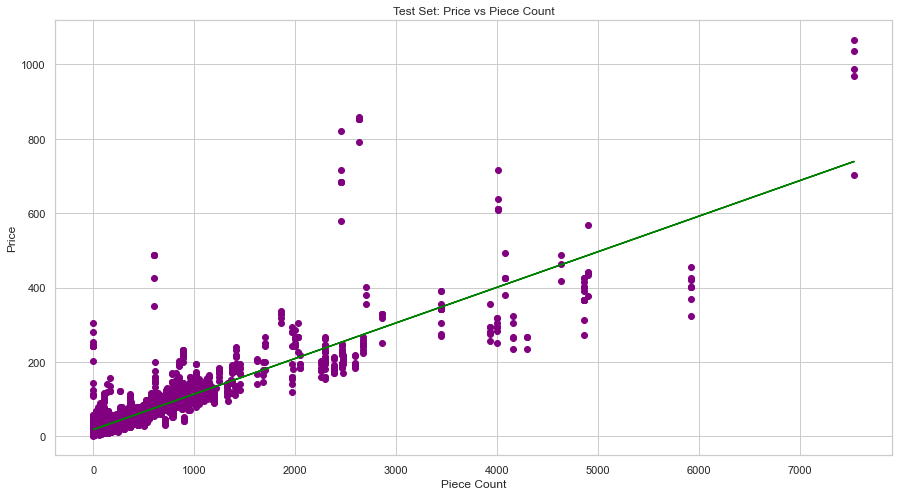

In [37]:
# Scatterplot to visualise test model

# [1] Create a scatterplot.
plt.scatter(X_test, y_test, color = "purple")  
# [2] Create a regression line in green.
plt.plot(X_test, y_pred2, color = "green")
# [3] Set the title for the graph.  
plt.title("Test Set: Price vs Piece Count")
# [4] Set the label for the x-axis.  
plt.xlabel("Piece Count")
# [5] Set the label for the y-axis.   
plt.ylabel("Price") 



# Export graph
plt.savefig("Test Set: Price vs Piece Count")

In [38]:
# Print R-squared value of the test data.
print("R-squared:", lm.score(X_test,y_test))

R-squared: 0.736283806932537


As a rule of thumb,  values greater than 0.60 are typically considered acceptable. Quite strong R-squared value and explains 74% of the dependent variable.

In [39]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

Intercept value:  18.042636129589262
Coefficient value:  [0.09561197]


Intercept and coefficient values are quite close to that obtained from training data set.

In [40]:
# Predict the price for a lego product with 8000 pieces with test data set.
predictedPrice = lm.predict([[8000]])  

# Print the results.
print(predictedPrice)

[782.93836492]


/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Report:** After testing the linear regression model derived from the training data set, the predicted price for lego product with 8000 pieces is very similar at USD 783, validating the model. Thus, the business is recommended to price lego products with 8000 pieces at USD 783.

y = m (slope coefficient) x + c intercept 

# Part 2: Multiple Linear regression

Question: What price should be set for the Lego sets with 8,000 Lego pieces that are most likely to be purchased by 30-year-old customers?

## 1. Create subset with Price, Ages and Piece variables

In [41]:
# Create subset with price, ages, and piece variables

mlr_data = lego[['list_price','piece_count','ages']]

mlr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   list_price   12261 non-null  float64
 1   piece_count  12261 non-null  int64  
 2   ages         12261 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 287.5 KB


In [42]:
mlr_data.head()

,list_price,piece_count,ages
0,29.99,277,19
1,19.99,168,19
2,12.99,74,19
3,99.99,1032,5
4,79.99,744,5


In [43]:
round(mlr_data.describe(),2)

,list_price,piece_count,ages
count,12261.00,12261.00,12261.00
mean,65.14,493.41,16.69
std,91.98,825.36,8.22
min,2.27,1.00,0.00
25%,19.99,97.00,11.00
50%,36.59,216.00,19.00
75%,70.19,544.00,23.00
max,1104.87,7541.00,30.00


## 2. Split the data into train (70%) and test (30%) data to ensure maximum model performance

The regression model should be run on training and testing data sets to ensure the model performance is accurate.

In [44]:
# Independent variable
X = mlr_data[['piece_count', 'ages']]

# Dependent variable
y = mlr_data['list_price'] 

In [45]:
# create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

## 3. Fit Multiple Linear Regression model with Training dataset

In [46]:
# Fit linear regression model
mlr = LinearRegression()

# Fit the model
mlr.fit(X_train, y_train)

LinearRegression()

In [47]:
# Call predictions for x array
mlr.predict(X_train)

array([105.31946916,  38.79803594,  25.21506289, ...,  28.52852519,
        26.36951271,  44.92267922])

In [48]:
len(mlr.predict(X_train))

8582

In [49]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", mlr.score(X_train, y_train)) # Print the R-squared value
print("Intercept: ", mlr.intercept_) # Print the intercepts
print("Coefficients:") # Print coefficients
list(zip(X_train, mlr.coef_)) # Map similar index of multiple containers

R-squared:  0.7681985466459664
Intercept:  16.985596749203417
Coefficients:


[('piece_count', 0.09569755116044504), ('ages', 0.02987278094702156)]

R-squared is quite strong where the independent variable, pieces and age, explains 76% variation of the dependent variable, price. 

Coefficient is the amount increase in price (dependent variable) when 1 unit increase in piece or age (independent variable).

In [50]:
# Make predictions
# Set a variable as 8000 pieces
New_pieces = 8000

# Set a variable as 30 year old
New_age = 30

# Print the predicted price value
print ('Predicted Value: \n', mlr.predict([[New_pieces, New_age]]))  

Predicted Value: 
 [783.46218946]


/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 2. Test the model 

In [51]:
# Fit the model
mlr.fit(X_test, y_test)

LinearRegression()

In [52]:
# Call predictions for x array
mlr.predict(X_test)

array([ 71.90885633, 152.50147237,  28.35292912, ...,  17.77607882,
        79.03487454,  71.46921704])

In [53]:
len(mlr.predict(X_test))

3679

In [54]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", mlr.score(X_test, y_test)) # Print the R-squared value
print("Intercept: ", mlr.intercept_) # Print the intercepts
print("Coefficients:") # Print coefficients
list(zip(X_test, mlr.coef_)) # Map similar index of multiple containers

R-squared:  0.7344069243325273
Intercept:  16.516853988947737
Coefficients:


[('piece_count', 0.09961851206458482), ('ages', 0.029226634168314652)]

R-squared of 0.73 signifies 73% of the variation in price (y dependent variable) can be explained by age of customer and pieces in lego products (x independent variables).

In [55]:
# Make predictions
# Set a variable as 8000 pieces
New_pieces2 = 8000

# Set a variable as 30 year old
New_age2 = 30

# Print the predicted price value
print ('Predicted Value: \n', mlr.predict([[New_pieces2, New_age2]]))  

Predicted Value: 
 [814.34174953]


/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Report:** According to the test model, the predicted price of a lego product with 8000 pieces purchased by 30 year old customers is USD 814.

## OLS. Training and testing subsets with MLR

In [56]:
# Training the model using the 'statsmodel' OLS Library
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
Y_pred = model.predict(sm.add_constant(X_train))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:05:46   Log-Likelihood:                -44428.
No. Observations:                8582   AIC:                         8.886e+04
Df Residuals:                    8579   BIC:                         8.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.9856      1.107     15.341      

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The small the standard error the better, more precise estimates of the predictions.

Smaller standard error, the larger the t-value would be.

In [57]:
# Training the model using the 'statsmodel' OLS Library
model = sm.OLS(y_test, sm.add_constant(X_test)).fit()
Y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     5082.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:05:46   Log-Likelihood:                -19669.
No. Observations:                3679   AIC:                         3.934e+04
Df Residuals:                    3676   BIC:                         3.936e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.5169      2.017      8.190      

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
